In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [128]:
n_points = 31
slope_x = 0.5
slope_y = 0
offset  = 0
extent = 2
noise = 2

In [129]:
x_target = 0
y_target = 0
z_target = slope_x * x_target + slope_y * y_target + offset
x = np.random.normal(loc=x_target, scale=extent, size=n_points)
y = np.random.normal(loc=y_target, scale=extent, size=n_points)
z = slope_x * x + slope_y * y + offset + np.random.normal(scale=noise, size=x.size)
points = np.c_[x, y, z]

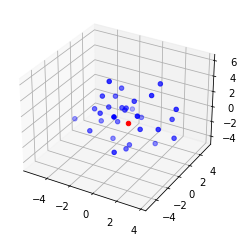

In [130]:
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, color='b')
ax.scatter(x_target, y_target, z_target, color='r');

In [174]:
def PCA(data):
    mean_data = np.mean(data, axis=0)
    normalized_data = data - mean_data
    H = np.dot(normalized_data.T, normalized_data)
    eigenvector, eigenvalue, _ = np.linalg.svd(H)
    return eigenvalue, eigenvector

In [175]:
xs = np.linspace(x.min(), x.max(), 33)
ys = np.linspace(y.min(), y.max(), 33)
X, Y = np.meshgrid(xs, ys)
Z = slope_x * X + slope_y * Y

eigenvalue, eigenvector = PCA(np.c_[X.ravel(), Y.ravel(), Z.ravel()])
n = eigenvector[:, np.where(eigenvalue == eigenvalue.min())[0]]

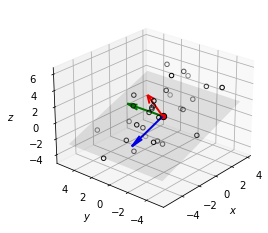

In [177]:
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, ec='k', fc='None', zorder=0)
ax.scatter(x_target, y_target, z_target, ec='k', fc='r', s=40, zorder=0)
ax.quiver(x_target, y_target, z_target, *n, normalize=True, color='r', lw=2, length=4, zorder=1)
ax.quiver(x_target, y_target, z_target, *evecs[:, 0], normalize=True, color='g', lw=2, length=4, zorder=1)
ax.quiver(x_target, y_target, z_target, *evecs[:, 1], normalize=True, color='b', lw=2, length=4, zorder=1)
ax.plot_surface(X,Y,Z, color='k', alpha=0.1)
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
ax.view_init(25, -140)